# Exercise 07

In [2]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## 1. analyze only the users and not the admins
## 2. you can choose the color palette that you like for both of the graphs that you will need to draw in this exercise
## 3. use the table checker for your query
## 4. use absolute values of the commits, not the averages
## 5. sort the dataframes by the total number of commits made by a user

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

In [4]:
sql_query = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
df = pd.read_sql(sql_query, connection)
df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [5]:
days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['timestamp'] = pd.to_datetime(df['timestamp'].dt.date)
df['day_type'] = df['timestamp'].apply(lambda x: days[x.dayofweek])
df.drop('timestamp', axis=1, inplace=True)
df

,uid,hour,day_type
0,user_4,5,Fri
1,user_4,5,Fri
2,user_4,5,Fri
3,user_4,5,Fri
4,user_4,5,Fri
...,...,...,...
3202,user_1,20,Thu
3203,user_1,20,Thu
3204,user_1,20,Thu
3205,user_1,20,Thu


In [6]:
df_1 = df.pivot_table(index='day_type', columns='uid', values='uid', aggfunc='count', fill_value=0)
df_1 = df_1.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
sort_commit = df_1.sum(axis=0)
sort_commit = sort_commit.sort_values(ascending=False).index
df_1 = df_1[sort_commit]
df_1

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
day_type,,,,,,,,,,,,,,,,,,,,,
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Sat,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Sun,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0


In [7]:
df_2 = df.pivot_table(index='hour', columns='uid', values='uid', aggfunc='count', fill_value=0)
sort_commit = df_1.sum(axis=0)
sort_commit = sort_commit.sort_values(ascending=False).index
df_2 = df_2[sort_commit]
df_2

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,1,0,0,1,0
9,0,4,13,0,0,3,0,1,0,3,...,0,0,0,2,0,0,3,0,0,0
10,26,2,42,18,20,16,0,0,0,2,...,7,0,0,0,0,0,0,0,0,0


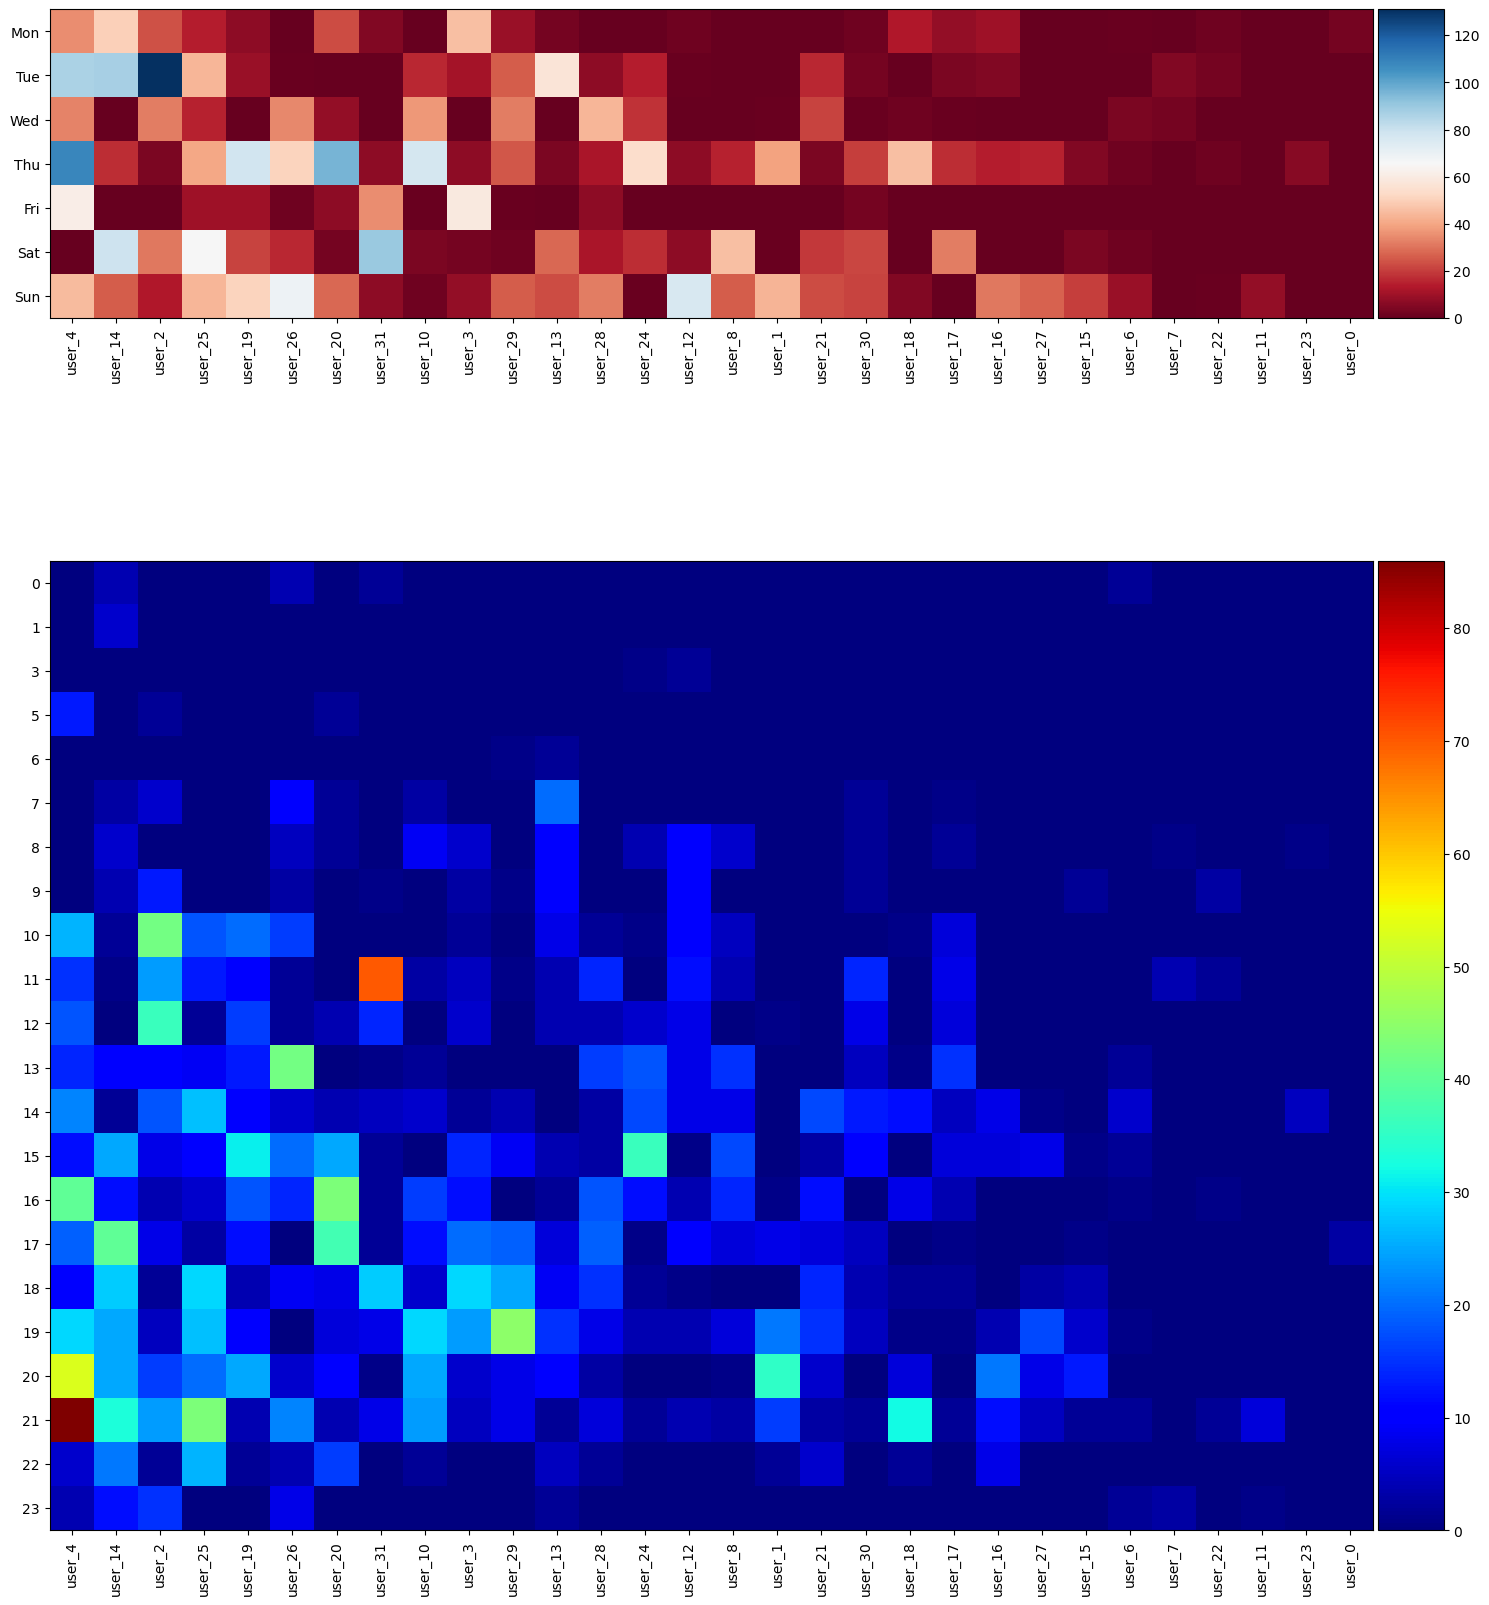

In [8]:

# Создаем фигуру с двумя субплотами (2 строки, 1 столбец)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))

# Верхний график (df_1)
im1 = ax1.imshow(df_1, cmap='RdBu')
ax1.set_xticks(range(df_1.shape[1]))
ax1.set_yticks(range(df_1.shape[0]))
ax1.set_xticklabels(df_1.columns, rotation=90)  # Используйте df_1.columns для меток
ax1.set_yticklabels(df_1.index)

# Добавляем цветовую шкалу для верхнего графика
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)

# Нижний график (df_2)
im2 = ax2.imshow(df_2, cmap='jet')
ax2.set_xticks(range(df_2.shape[1]))
ax2.set_yticks(range(df_2.shape[0]))
ax2.set_xticklabels(df_2.columns, rotation=90)  # Используйте df_2.columns для меток
ax2.set_yticklabels(df_2.index)

# Добавляем цветовую шкалу для нижнего графика
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)

# Настраиваем отступы между графиками
plt.tight_layout()
plt.show()

In [9]:
connection.close()

## 6. Question

**“Which user has the most commits on Tue?”** The answer: user_2.

**“Which user has the most commits on Thu?”** The answer: user_4.

**“On which weekday do the users not like making a lot of commits?”** The
answer: Friday.

**“Which user at which hour made the largest number of commits?”** The answer: user_4, 21.